In [472]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [473]:
dataset = pd.read_csv("titanic.csv")
dataset

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [474]:
X = dataset[['Fare', 'Age']].values
y = dataset[['Survived']].values

In [475]:
X


array([[ 7.25  , 22.    ],
       [71.2833, 38.    ],
       [ 7.925 , 26.    ],
       ...,
       [23.45  ,  7.    ],
       [30.    , 26.    ],
       [ 7.75  , 32.    ]])

In [476]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

X

array([[-0.50358635, -0.52936601],
       [ 0.78341245,  0.60426454],
       [-0.49001959, -0.24595837],
       ...,
       [-0.17798419, -1.59214465],
       [-0.04633641, -0.24595837],
       [-0.4935369 ,  0.17915309]])

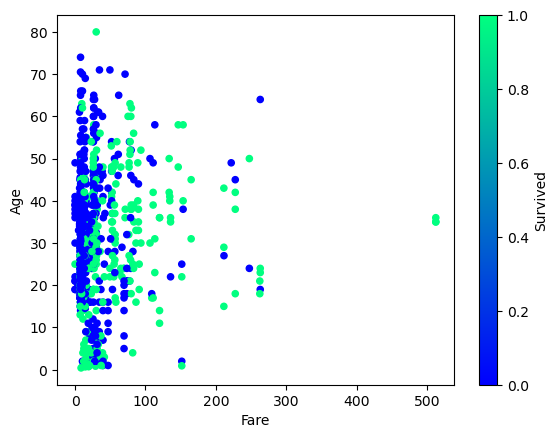

In [477]:
dataset.plot.scatter(x='Fare',y='Age', c='Survived', colormap='winter')
plt.show()

In [478]:
# La fonction sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [479]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [480]:
# Modèle
def modele(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    return A

In [481]:
def log_loss(y, A):
    return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [482]:
def gradients(X, A, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    return (dW, db)

In [483]:
def optimisation(X, W, b, A, y, learning_rate):
    dW, db = gradients(X, A, y)
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [484]:
def predict(X, W, b):
    A = modele(X, W, b)
    print(A)
    return A >= 0.5

In [485]:
def regression_logistique(X, y, learning_rate=0.01, n_iter=1000):
  # Initialisation
    W, b = initialisation(X)
    loss_history = []
  # Entrainement
    for i in range(n_iter):
        A = modele(X, W, b)
        loss_history.append(log_loss(y, A))
        W, b = optimisation(X, W, b, A, y, learning_rate=0.1)

  # Prediction
    plt.plot(loss_history)
    plt.xlabel('n_iteration')
    plt.ylabel('Log_loss')
    plt.title('Evolution des erreurs')
    return W,b

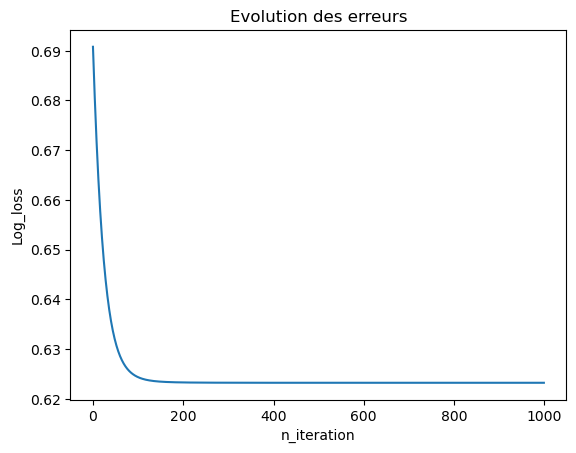

In [486]:
W,b=regression_logistique(X, y)

In [487]:
from sklearn.metrics import accuracy_score
y_pred = predict(X, W, b)
print("Accuracy=",accuracy_score(y, y_pred))

[[0.32431267]
 [0.51322845]
 [0.31322587]
 [0.4515397 ]
 [0.28445154]
 [0.31174922]
 [0.37547644]
 [0.44997608]
 [0.32109927]
 [0.4399683 ]
 [0.42495783]
 [0.27292644]
 [0.33400852]
 [0.35225915]
 [0.35426952]
 [0.24902026]
 [0.48233871]
 [0.34150589]
 [0.33187396]
 [0.32422415]
 [0.3469657 ]
 [0.30427983]
 [0.35137793]
 [0.40843569]
 [0.42709394]
 [0.35621881]
 [0.31079755]
 [0.96909742]
 [0.31976813]
 [0.32320589]
 [0.33580319]
 [0.75285392]
 [0.33984723]
 [0.20373096]
 [0.59478737]
 [0.42051237]
 [0.33796154]
 [0.33057134]
 [0.37793344]
 [0.36689044]
 [0.27350409]
 [0.35680172]
 [0.52874352]
 [0.33684656]
 [0.30047694]
 [0.36130283]
 [0.30929854]
 [0.39941878]
 [0.37717387]
 [0.50564052]
 [0.32967789]
 [0.49263205]
 [0.36831476]
 [0.3738558 ]
 [0.34315019]
 [0.33939114]
 [0.30257733]
 [0.46521364]
 [0.51927904]
 [0.32423902]
 [0.54829725]
 [0.53531837]
 [0.46967358]
 [0.25848553]
 [0.40795413]
 [0.312181  ]
 [0.33785484]
 [0.34396928]
 [0.3157954 ]
 [0.30228978]
 [0.49992393]
 [0.58

[0.40460422]
[False]
[0.54401593]
[ True]
[0.52594452]
[ True]


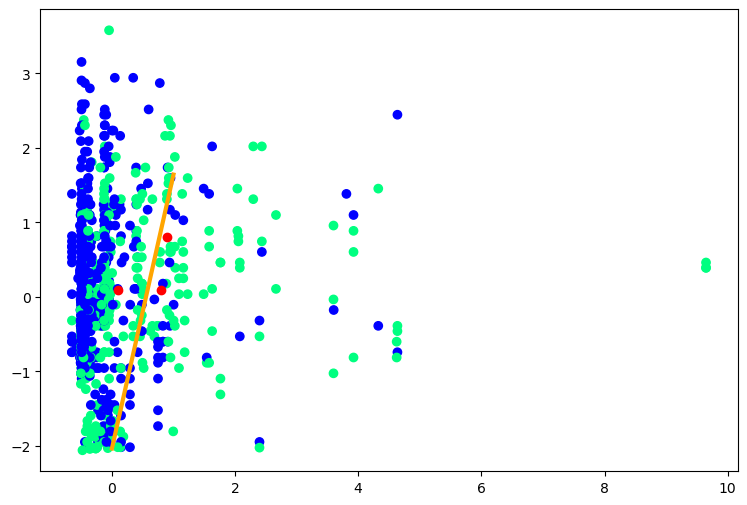

In [488]:
# Visualiser le dataset
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X[:,0], X[:, 1], c=y, cmap='winter')

# Dessiner la frontière de décision
x1 = np.linspace(0, 1, 200)
x2 = ( - W[0] * x1 - b) / W[1]
ax.plot(x1, x2, c='orange', lw=3)

# Prédire la classe de nouveaux éléments
new_1=np.array([0.1,0.1])
new_2=np.array([0.8,0.1])
new_3=np.array([0.9,0.8])
ax.scatter(new_1[0], new_1[1], c='r')
ax.scatter(new_2[0], new_2[1], c='r')
ax.scatter(new_3[0], new_3[1], c='r')
print(predict(new_1, W, b))
print(predict(new_2, W, b))
print(predict(new_3, W, b))

plt.show()

In [489]:
#Affichage de la matrice de confusion

from sklearn.metrics import confusion_matrix
y_pred = predict(X, W, b)
cm = confusion_matrix(y, y_pred)
print(cm)

[[0.32431267]
 [0.51322845]
 [0.31322587]
 [0.4515397 ]
 [0.28445154]
 [0.31174922]
 [0.37547644]
 [0.44997608]
 [0.32109927]
 [0.4399683 ]
 [0.42495783]
 [0.27292644]
 [0.33400852]
 [0.35225915]
 [0.35426952]
 [0.24902026]
 [0.48233871]
 [0.34150589]
 [0.33187396]
 [0.32422415]
 [0.3469657 ]
 [0.30427983]
 [0.35137793]
 [0.40843569]
 [0.42709394]
 [0.35621881]
 [0.31079755]
 [0.96909742]
 [0.31976813]
 [0.32320589]
 [0.33580319]
 [0.75285392]
 [0.33984723]
 [0.20373096]
 [0.59478737]
 [0.42051237]
 [0.33796154]
 [0.33057134]
 [0.37793344]
 [0.36689044]
 [0.27350409]
 [0.35680172]
 [0.52874352]
 [0.33684656]
 [0.30047694]
 [0.36130283]
 [0.30929854]
 [0.39941878]
 [0.37717387]
 [0.50564052]
 [0.32967789]
 [0.49263205]
 [0.36831476]
 [0.3738558 ]
 [0.34315019]
 [0.33939114]
 [0.30257733]
 [0.46521364]
 [0.51927904]
 [0.32423902]
 [0.54829725]
 [0.53531837]
 [0.46967358]
 [0.25848553]
 [0.40795413]
 [0.312181  ]
 [0.33785484]
 [0.34396928]
 [0.3157954 ]
 [0.30228978]
 [0.49992393]
 [0.58

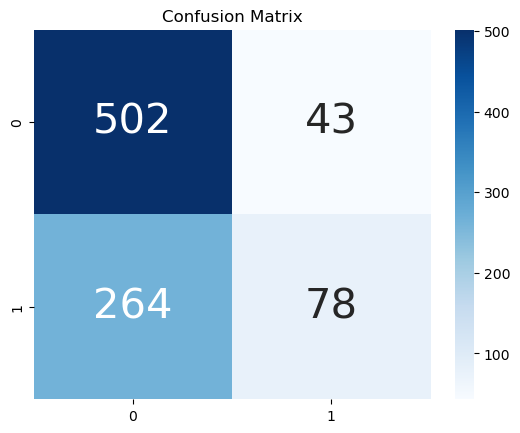

In [490]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
# confusion matrix sns heatmap 
## https://www.kaggle.com/agungor2/various-confusion-matrix-plots
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()